<a href="https://colab.research.google.com/github/hyunicecream/Natural-Language-Processing-NLP-/blob/main/7_11_%EC%9D%BC(%ED%95%9C%EA%B5%AD%EC%96%B4_Word2Vec_%EB%84%A4%EC%9D%B4%EB%B2%84_%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import numpy as np

In [7]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f6f36373590>)

In [8]:
train_data = pd.read_table('ratings.txt')
train_data[0:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [9]:
# 리뷰 개수 출력
print(len(train_data))

200000


In [10]:
# Null 값 확인
print(train_data.isnull().sum())

id          0
document    8
label       0
dtype: int64


In [11]:
# Null 값 제거
train_data = train_data.dropna()
print(train_data.isnull().sum())

id          0
document    0
label       0
dtype: int64


In [12]:
print(len(train_data))

199992


In [13]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", "")
train_data[0:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [14]:
 # 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [15]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
  temp_X = okt.morphs(sentence, stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  tokenized_data.append(temp_X)

In [18]:
# 리뷰 길이 분포 확인
print('리뷰의 최대길이:', max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))

리뷰의 최대길이: 72
리뷰의 평균 길이 : 10.716703668146726


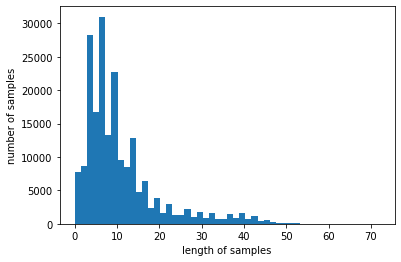

In [20]:
# 그래프로 보기
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [21]:
# Gensim으로 모델 생성
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 1)

In [22]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [26]:
model.wv.most_similar("정우성")

[('이민정', 0.8418855667114258),
 ('송중기', 0.841849684715271),
 ('심은하', 0.8410532474517822),
 ('심은경', 0.834694504737854),
 ('한효주', 0.8298605680465698),
 ('송윤아', 0.826591432094574),
 ('조승우', 0.8260791301727295),
 ('정려원', 0.821774423122406),
 ('천정명', 0.8189171552658081),
 ('이범수', 0.8173674941062927)]

In [25]:
model.wv.most_similar("액션")

[('액션씬', 0.7419195175170898),
 ('레이싱', 0.7145004868507385),
 ('격투씬', 0.7132748961448669),
 ('코메', 0.7119385004043579),
 ('격투', 0.7098703384399414),
 ('볼거리', 0.6923270225524902),
 ('디도', 0.690762996673584),
 ('액션영화', 0.6887491941452026),
 ('총격', 0.6858565807342529),
 ('무협', 0.6850756406784058)]